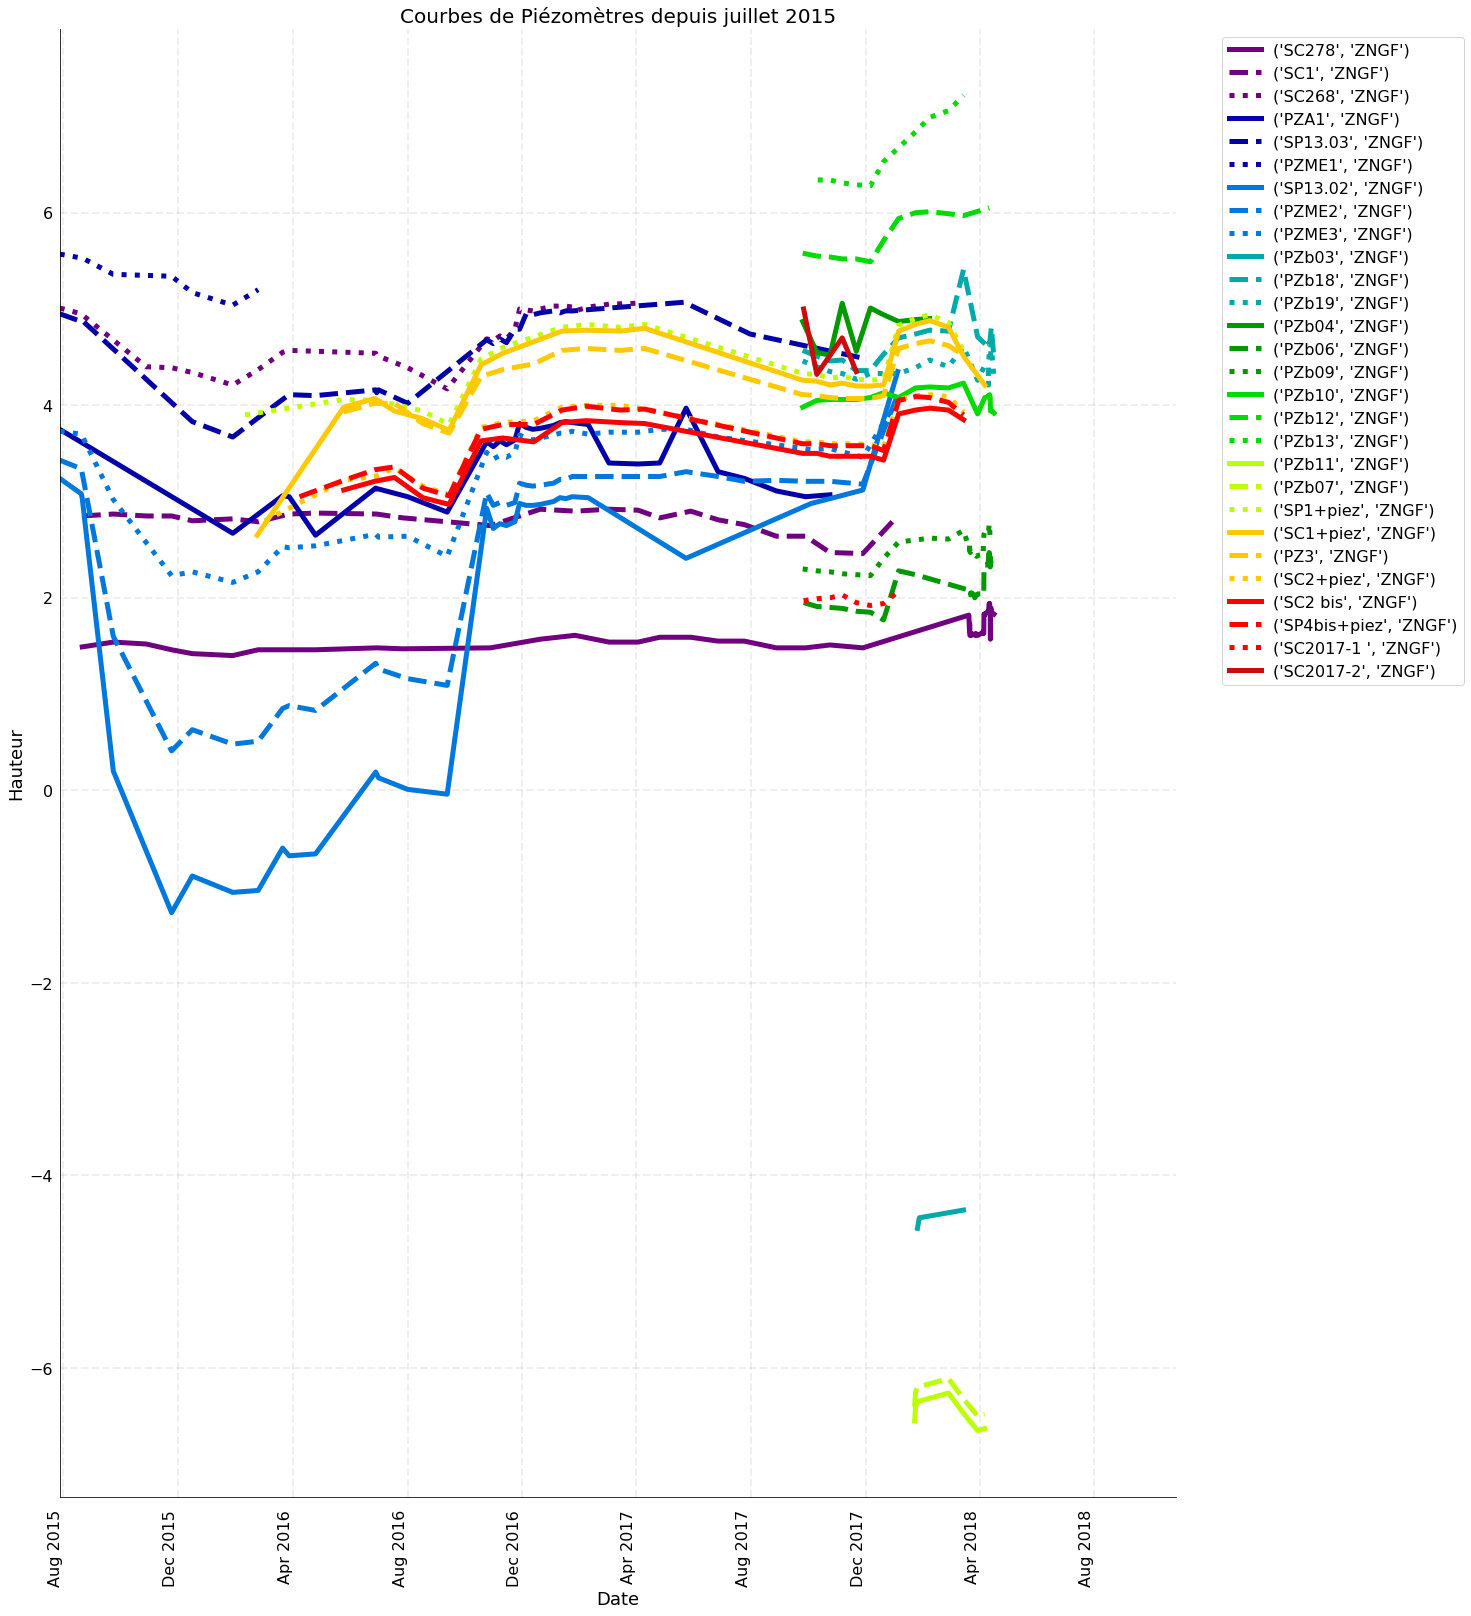

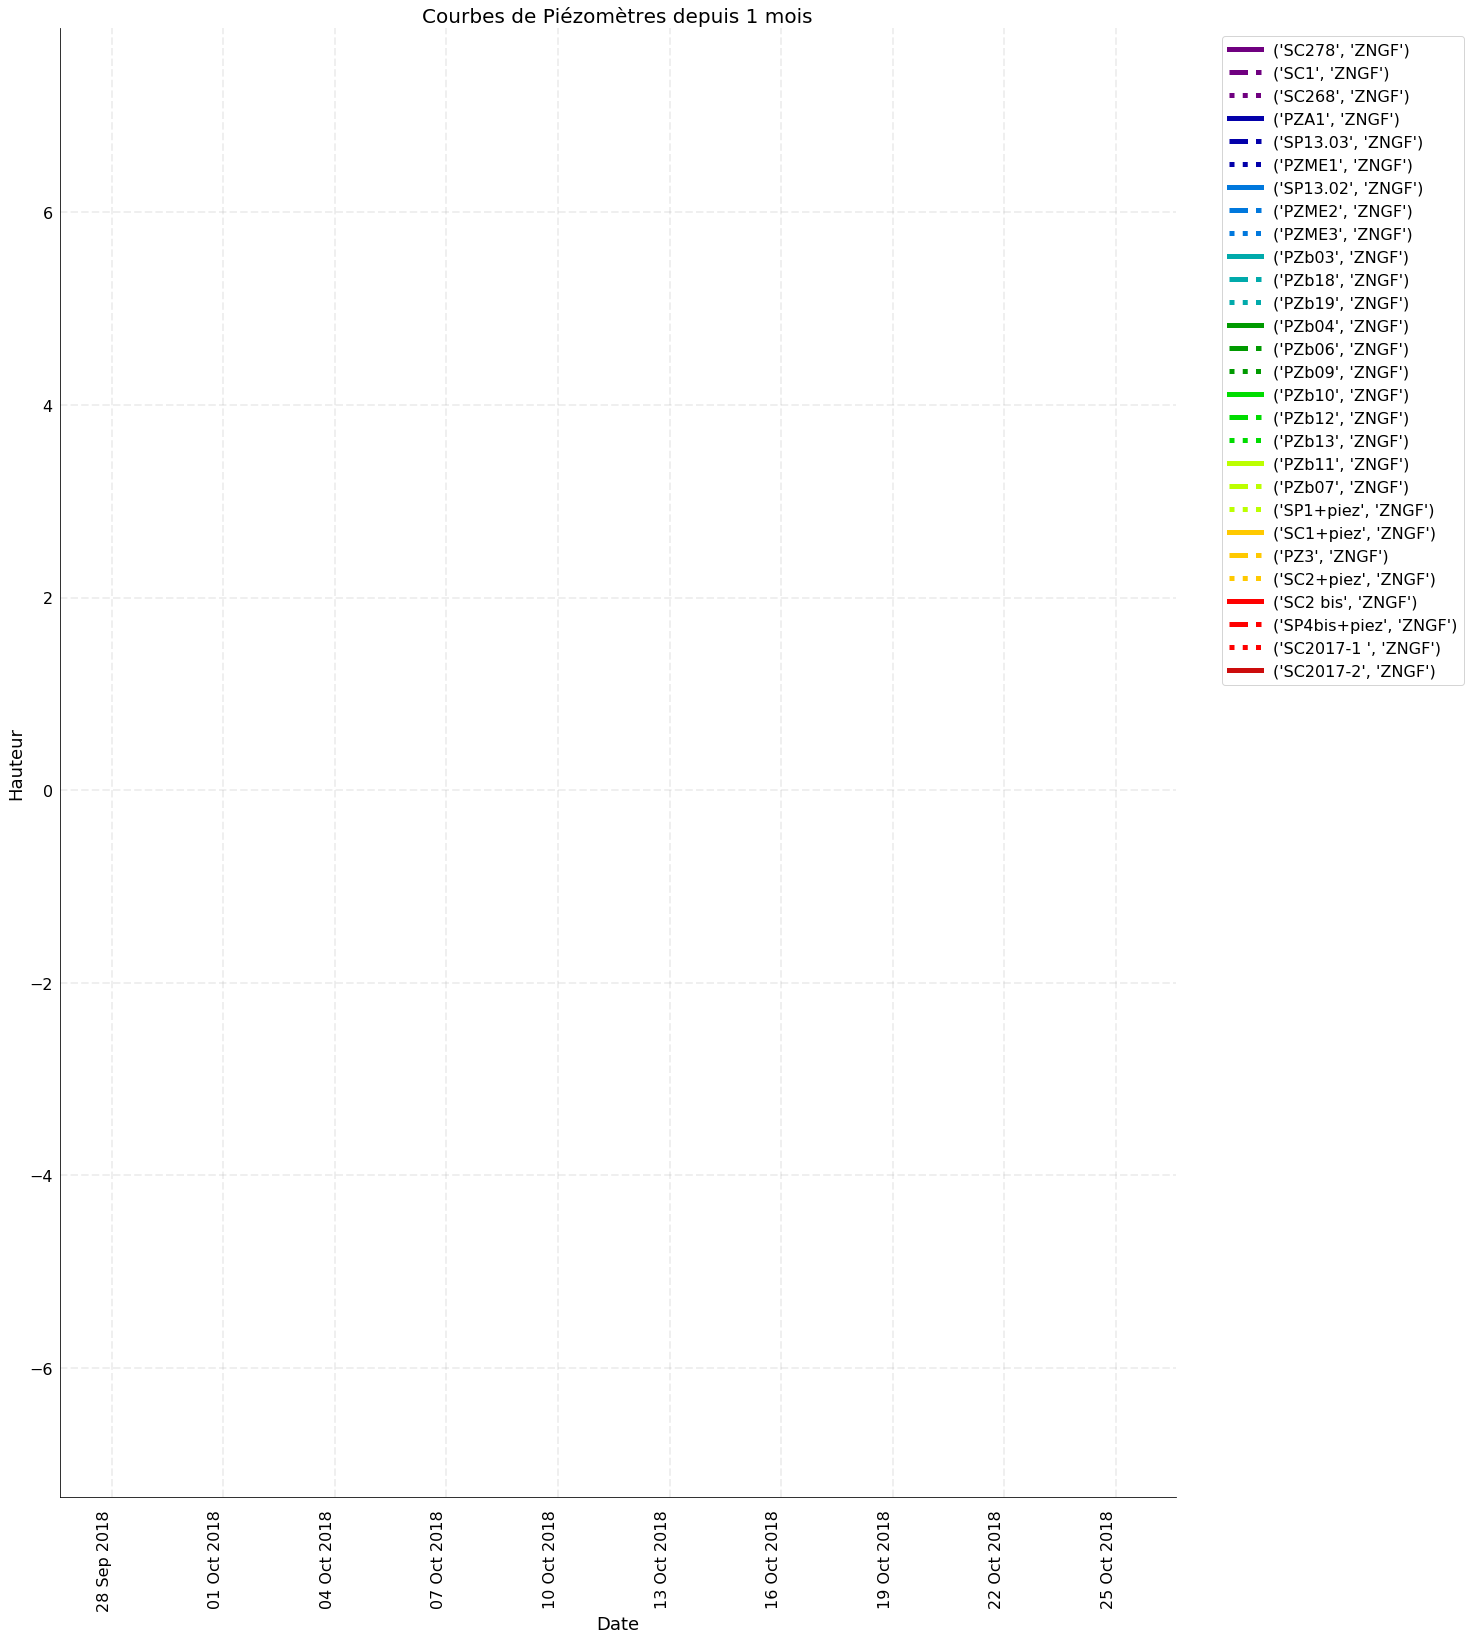

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as dates
from cycler import cycler
import datetime
from itertools import cycle

def excel_chantier_to_2plot():
    
    file = 'PIEZO POUR COURBES.xlsx'
    courbes = pd.ExcelFile(file).parse(parse_dates = True, header = [0, 1], index_col = 0, skiprows = (1,2,3,4,5,6,8), na_values=['NaN'])
    courbes = courbes.filter(regex='ZNGF')
    courbes = courbes.rename_axis(['piezo', 'ZNGF'], axis=1)
    courbes = courbes.apply(pd.to_numeric, errors = 'coerce')
    courbes_bad = courbes[courbes.index.str.contains("à")]
    courbes = courbes[~courbes.index.str.contains("à")]
    courbes = courbes.reset_index()
    courbes_bad = courbes_bad.reset_index()
    courbes_bad['index'] = courbes_bad['index'].str.replace("à ", "")
    courbes_bad['index'] = pd.to_datetime(courbes_bad['index'], format = '%d/%m/%Y %H:%M')
    courbes_bad = courbes_bad.set_index('index')
    courbes['index'] = pd.to_datetime(courbes['index'])
    courbes = courbes.set_index('index')
    courbes_final = courbes.append(courbes_bad)
    
    
    fig1 = plt.figure(figsize = (20,30))
    colors = [plt.cm.nipy_spectral(i) for i in np.linspace(0.05, 0.95, 10)]
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    plt.gca().set_prop_cycle(cycler('color', colors) * cycler('linestyle', ['-', '--', ':']))
    
   
    for _, c in courbes_final.iteritems():
        c.dropna().plot(linewidth = 5)
    
    ax = plt.gca()
    ax.tick_params(labelsize = 16)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y '))
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    
    plt.grid(alpha = 0.2)
    ax.grid(linestyle='--', linewidth=2)
    plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Hauteur', fontsize=18)
    plt.title('Courbes de Piézomètres depuis juillet 2015', fontsize=20)
    plt.legend(courbes_final, loc=9, bbox_to_anchor=(1.15, 1), fontsize=16)
    bx = plt.gca().xaxis
    for item in bx.get_ticklabels():
        item.set_rotation(90)
    
    dstart_begining = courbes_final.index[0]
    dstart_30 = datetime.datetime.now() + datetime.timedelta(-30)
    dend = datetime.datetime.now()
    plt.xlim(dstart_begining, dend)
    fig1.savefig('graph_dep2015.png', format = 'png', bbox_inches='tight')

    fig2 = plt.figure(figsize = (20,30))
    num_plots = courbes_final.shape[1]
    colors = [plt.cm.nipy_spectral(i) for i in np.linspace(0.05, 0.95, 10)]
    plt.gca().set_prop_cycle(cycler('color', colors) * cycler('linestyle', ['-', '--', ':']))
   
    for _, c in courbes_final.iteritems():
        c.dropna().plot(linewidth = 5)
    
    ax = plt.gca()
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y '))
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    
    plt.grid(alpha = 0.2)
    ax.grid(linestyle='--', linewidth=2)
    ax.tick_params(labelsize = 16)
    plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Hauteur', fontsize=18)
    plt.title('Courbes de Piézomètres depuis 1 mois', fontsize=20)
    plt.legend(courbes_final, loc=9, bbox_to_anchor=(1.15, 1), fontsize=16)
    bx = plt.gca().xaxis
    for item in bx.get_ticklabels():
        item.set_rotation(90)
    
    dstart_begining = courbes_final.index[0]
    dstart_30 = datetime.datetime.now() + datetime.timedelta(-30)
    dend = datetime.datetime.now()
    plt.xlim(dstart_30, dend)
    fig2.savefig('graph_mensuel.png', format = 'png', bbox_inches='tight')
    
excel_chantier_to_2plot()